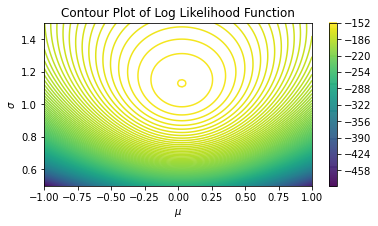

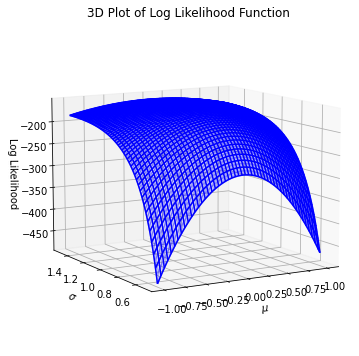

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成 N=100 的正態分佈樣本，假設真實的 mu 和 sigma
np.random.seed(123)
n = 100
mu = 0
sigma = 1
x = norm.rvs(mu, sigma, n)

# 定義對數聯合概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(norm.logpdf(x, mu, sigma))

# 計算對數聯合概似函數在不同 mu 和 sigma 值下的值
mu_values = np.linspace(-1, 1, 100)
sigma_values = np.linspace(0.5, 1.5, 100)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)
L = np.zeros(MU.shape)

for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        L[i, j] = log_likelihood(x, MU[i, j], SIGMA[i, j])

# 繪製等高線圖
plt.figure(figsize=(6, 3))
contour = plt.contour(MU, SIGMA, L, levels=200)
plt.colorbar(contour, label='')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('Contour Plot of Log Likelihood Function')
plt.show()

# 繪製線框圖
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection = '3d')
# ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MU, SIGMA, L, color='b',
                  alpha=0.3, rstride = 1, cstride = 1)
ax.plot_wireframe(MU, SIGMA, L, color='b')
ax.view_init(10, -120)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel('Log Likelihood')
ax.set_title('3D Plot of Log Likelihood Function')
plt.show()